In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
from sklearn.datasets import load_iris
data, label = load_iris(return_X_y=True)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
from sklearn.model_selection import train_test_split
X = torch.from_numpy(data).type(torch.float)
y = torch.from_numpy(label).type(torch.long)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [4]:
class IrisModel(nn.Module):
    def __init__(self, hidden_layer_neurons=8):
        super().__init__() 
        self.layers = nn.Sequential(
            nn.Linear(in_features=4, out_features=hidden_layer_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer_neurons, out_features=hidden_layer_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer_neurons, out_features=3)
        )

    def forward(self, x):
        return self.layers(x)

In [5]:
device = 'cpu'

In [6]:
model_0 = IrisModel()
model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(), lr = 0.01
)

In [8]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [9]:
epochs = 2000
torch.manual_seed(42)
trainLossList = []
testLossList = []
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train)  # Raw logits (no sigmoid)
    y_pred = torch.argmax(y_logits, dim=1)  # Convert logits to predicted class indices

    # Training loss
    loss = loss_fn(y_logits, y_train)  # CrossEntropyLoss expects raw logits and class indices
    trainLossList.append(loss.cpu().detach().numpy())

    # Zero grad optimizer
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Update weights
    optimizer.step()

    # Calculate accuracy
    acc = accuracy(y_true=y_train, y_pred=y_pred)

    # Evaluation
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test)  # Raw logits (no sigmoid)
        test_preds = torch.argmax(test_logits, dim=1)  # Convert logits to predicted class indices
        test_loss = loss_fn(test_logits, y_test)  # CrossEntropyLoss expects raw logits and class indices
        testLossList.append(test_loss.cpu().detach().numpy())
        test_acc = accuracy(y_test, test_preds)

    # Print progress
    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}"
            f"\n     | Train Accuracy: {acc:.4f} | Test Accuracy: {test_acc:.4f}"
        )

Epoch: 0 | Train Loss: 1.0905 | Test Loss: 1.0916
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 10 | Train Loss: 1.0839 | Test Loss: 1.0855
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 20 | Train Loss: 1.0783 | Test Loss: 1.0802
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 30 | Train Loss: 1.0730 | Test Loss: 1.0751
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 40 | Train Loss: 1.0679 | Test Loss: 1.0700
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 50 | Train Loss: 1.0628 | Test Loss: 1.0648
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 60 | Train Loss: 1.0580 | Test Loss: 1.0592
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 70 | Train Loss: 1.0531 | Test Loss: 1.0530
     | Train Accuracy: 35.0000 | Test Accuracy: 26.6667
Epoch: 80 | Train Loss: 1.0481 | Test Loss: 1.0462
     | Train Accuracy: 35.8333 | Test Accuracy: 26.6667
Epoch: 90 | Train Loss: 1.0428 | Test 

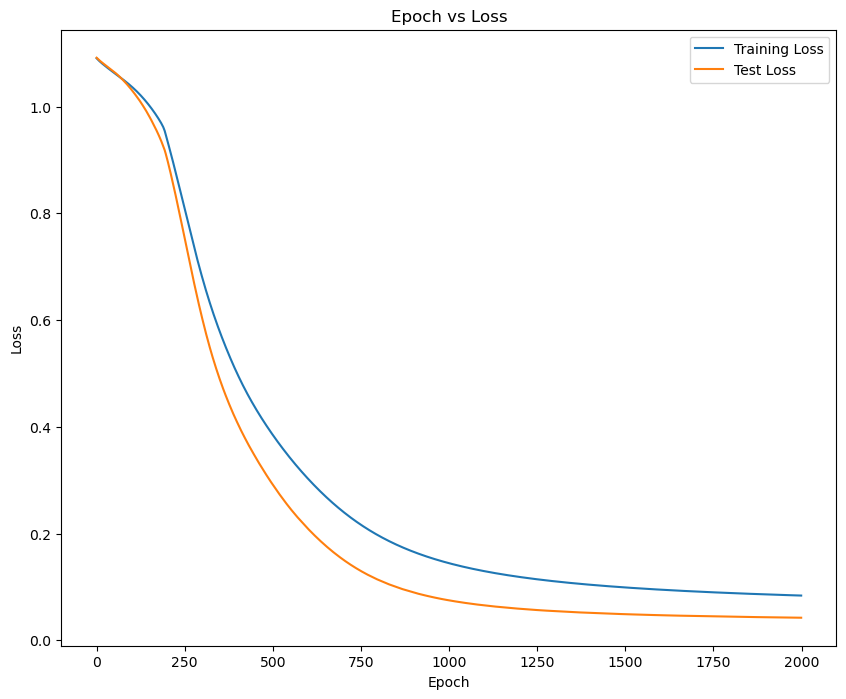

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend();

In [11]:
def plot_data(X_train=X_train, y_train=y_train, X_test=X_test, y_test = y_test, predictions=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_train, y_train, c='b', s=10, label="Training Data")
    plt.scatter(X_test, y_test, c='r', s=10, label="Testing Data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', s=10, label = "predicted data")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title("Scatter plot of X and y")

In [12]:
with torch.inference_mode():
    y_pred = torch.argmax(model_0(X_test), dim=1)

In [13]:
y_pred

tensor([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2,
        2, 2, 0, 1, 0, 0])